In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
from scipy.spatial.distance import cdist
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer
import plotly.figure_factory as ff
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#df_ls=pd.read_csv('/content/drive/My Drive/dataverse_files/ashoka university/TCPD_GE_all_2021-11-4.csv')
df_as_ap=pd.read_csv('/content/drive/My Drive/dataverse_files/ashoka university/TCPD_AE_Andhra_Pradesh_2021-11-4.csv')
#df_as_ts=pd.read_csv('/content/drive/My Drive/dataverse_files/ashoka university/TCPD_AE_Telangana_2021-11-4.csv')
#df_conversion=pd.read_excel('/content/drive/My Drive/dataverse_files/ashoka university/Constituency/parlimentary to assembly.ods', engine='odf')

<ipython-input-2-cfba189f6e74>:2: DtypeWarning: Columns (18,37,41,45,46,47,48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df_as_ap=pd.read_csv('/content/drive/My Drive/dataverse_files/ashoka university/TCPD_AE_Andhra_Pradesh_2021-11-4.csv')


In [3]:
#df_as_ts=df_as_ts[df_as_ts['Assembly_No']==1]
df_as_ap=df_as_ap[(df_as_ap['Assembly_No']==15)]
#df_term1_as = pd.concat([df_as_ap,df_as_ts ], axis=0)
#df_term1_ls=df_ls[(df_ls['Year']==2014) & ((df_ls['State_Name']=='Andhra_Pradesh') | (df_ls['State_Name']=='Telangana'))]
#mpi_district=pd.read_csv('/home/god/data/Constituency/MPI_AP.csv')

In [4]:
andhra=df_as_ap

In [5]:
andhra.columns

Index(['Election_Type', 'State_Name', 'Assembly_No', 'Constituency_No', 'Year',
       'month', 'Poll_No', 'DelimID', 'Position', 'Candidate', 'Sex', 'Party',
       'Votes', 'Candidate_Type', 'Valid_Votes', 'Electors',
       'Constituency_Name', 'Constituency_Type', 'Sub_Region', 'N_Cand',
       'Turnout_Percentage', 'Vote_Share_Percentage', 'Deposit_Lost', 'Margin',
       'Margin_Percentage', 'ENOP', 'pid', 'Party_Type_TCPD', 'Party_ID',
       'last_poll', 'Contested', 'Last_Party', 'Last_Party_ID',
       'Last_Constituency_Name', 'Same_Constituency', 'Same_Party', 'No_Terms',
       'Turncoat', 'Incumbent', 'Recontest', 'Age', 'District_Name', 'PC_Name',
       'PC_No', 'CandID', 'MyNeta_education', 'TCPD_Prof_Main',
       'TCPD_Prof_Main_Desc', 'TCPD_Prof_Second', 'TCPD_Prof_Second_Desc'],
      dtype='object')

In [6]:
andhra

,Election_Type,State_Name,Assembly_No,Constituency_No,Year,month,Poll_No,DelimID,Position,Candidate,...,Age,District_Name,PC_Name,PC_No,CandID,MyNeta_education,TCPD_Prof_Main,TCPD_Prof_Main_Desc,TCPD_Prof_Second,TCPD_Prof_Second_Desc
24747,AE,Andhra_Pradesh,15,1,2019,4,0,4,1,ASHOK BENDALAM,...,37.0,SRIKAKULAM,NaN,NaN,NaN,Graduate Professional,Liberal Profession or Professional,Doctor,NaN,NaN
24748,AE,Andhra_Pradesh,15,1,2019,4,0,4,2,PIRIYA SAIRAJ,...,42.0,SRIKAKULAM,NaN,NaN,NaN,Post Graduate,Business,NaN,NaN,NaN
24749,AE,Andhra_Pradesh,15,1,2019,4,0,4,3,DASARI RAJU,...,42.0,SRIKAKULAM,NaN,NaN,NaN,10th Pass,Salaried Work or Employed,NaN,NaN,NaN
24750,AE,Andhra_Pradesh,15,1,2019,4,0,4,4,NOTA,...,NaN,SRIKAKULAM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24751,AE,Andhra_Pradesh,15,1,2019,4,0,4,5,ESWARA RAO KOLLI,...,50.0,SRIKAKULAM,NaN,NaN,NaN,Graduate,Agriculture,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27035,AE,Andhra_Pradesh,15,175,2019,4,0,4,6,N.S. Thulasinath,...,40.0,CHITTOOR,NaN,NaN,NaN,12th Pass,Small Business or Self-employed,Self-employed,NaN,NaN
27036,AE,Andhra_Pradesh,15,175,2019,4,0,4,7,Dr. T.P. Surya Chandra Rao,...,56.0,CHITTOOR,NaN,NaN,NaN,Doctorate,Liberal Profession or Professional,NaN,NaN,NaN
27037,AE,Andhra_Pradesh,15,175,2019,4,0,4,8,C. Ganesh,...,37.0,CHITTOOR,NaN,NaN,NaN,10th Pass,Business,NaN,NaN,NaN
27038,AE,Andhra_Pradesh,15,175,2019,4,0,4,9,S. Sathish,...,32.0,CHITTOOR,NaN,NaN,NaN,Graduate,Salaried Work or Employed,NaN,NaN,NaN


In [7]:
andhra_2014=andhra[['District_Name','Poll_No','Position', 'Candidate', 'Sex', 'Party',
       'Votes', 'Candidate_Type', 'Valid_Votes', 'Electors',
       'Constituency_Name', 'Constituency_Type', 'Sub_Region', 'N_Cand','Margin','ENOP',
      'No_Terms','Turncoat','Contested',
      'Incumbent', 'Recontest', 'Age','MyNeta_education', 'TCPD_Prof_Main']]

In [8]:
pd.set_option('display.max_columns', None)
andhra_2014

,District_Name,Poll_No,Position,Candidate,Sex,Party,Votes,Candidate_Type,Valid_Votes,Electors,Constituency_Name,Constituency_Type,Sub_Region,N_Cand,Margin,ENOP,No_Terms,Turncoat,Contested,Incumbent,Recontest,Age,MyNeta_education,TCPD_Prof_Main
24747,SRIKAKULAM,0,1,ASHOK BENDALAM,MAL,TDP,79992,GENER,172423,247941,ICHCHAPURAM,GEN,COASTAL ANDHRA,7,7145,2.50,2.0,False,2.0,True,True,37.0,Graduate Professional,Liberal Profession or Professional
24748,SRIKAKULAM,0,2,PIRIYA SAIRAJ,MAL,YSRCP,72847,GENER,172423,247941,ICHCHAPURAM,GEN,COASTAL ANDHRA,7,61724,2.50,1.0,True,2.0,False,False,42.0,Post Graduate,Business
24749,SRIKAKULAM,0,3,DASARI RAJU,MAL,JnP,11123,GENER,172423,247941,ICHCHAPURAM,GEN,COASTAL ANDHRA,7,7243,2.50,0.0,False,1.0,False,False,42.0,10th Pass,Salaried Work or Employed
24750,SRIKAKULAM,0,4,NOTA,NaN,NOTA,3880,NaN,172423,247941,ICHCHAPURAM,GEN,COASTAL ANDHRA,7,1742,2.50,NaN,NaN,NaN,False,False,NaN,NaN,NaN
24751,SRIKAKULAM,0,5,ESWARA RAO KOLLI,MAL,INC,2138,GENER,172423,247941,ICHCHAPURAM,GEN,COASTAL ANDHRA,7,312,2.50,0.0,False,1.0,False,False,50.0,Graduate,Agriculture
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27035,CHITTOOR,0,6,N.S. Thulasinath,MAL,BJP,1139,GENER,181499,213329,KUPPAM,GEN,RAYALA SEEMA,10,436,2.22,0.0,False,2.0,False,False,40.0,12th Pass,Small Business or Self-employed
27036,CHITTOOR,0,7,Dr. T.P. Surya Chandra Rao,MAL,IND,703,GENER,181499,213329,KUPPAM,GEN,RAYALA SEEMA,10,42,2.22,0.0,False,1.0,False,False,56.0,Doctorate,Liberal Profession or Professional
27037,CHITTOOR,0,8,C. Ganesh,MAL,VCK,661,SC,181499,213329,KUPPAM,GEN,RAYALA SEEMA,10,174,2.22,0.0,False,1.0,False,False,37.0,10th Pass,Business
27038,CHITTOOR,0,9,S. Sathish,MAL,IND,487,GENER,181499,213329,KUPPAM,GEN,RAYALA SEEMA,10,171,2.22,0.0,False,1.0,False,False,32.0,Graduate,Salaried Work or Employed


In [9]:
andhra_2014=andhra_2014[(andhra_2014['Position']==1)]
andhra_2014=andhra_2014[(andhra_2014['Poll_No']==0)]

In [10]:
andhra_2014

,District_Name,Poll_No,Position,Candidate,Sex,Party,Votes,Candidate_Type,Valid_Votes,Electors,Constituency_Name,Constituency_Type,Sub_Region,N_Cand,Margin,ENOP,No_Terms,Turncoat,Contested,Incumbent,Recontest,Age,MyNeta_education,TCPD_Prof_Main
24747,SRIKAKULAM,0,1,ASHOK BENDALAM,MAL,TDP,79992,GENER,172423,247941,ICHCHAPURAM,GEN,COASTAL ANDHRA,7,7145,2.50,2.0,False,2.0,True,True,37.0,Graduate Professional,Liberal Profession or Professional
24754,SRIKAKULAM,0,1,APPALARAJU SEEDIRI,MAL,YSRCP,76603,GENER,150691,206799,PALASA,GEN,COASTAL ANDHRA,10,16247,2.38,1.0,False,1.0,False,False,39.0,Post Graduate,Liberal Profession or Professional
24764,SRIKAKULAM,0,1,ATCHANNAIDU KINJARAPU,MAL,TDP,87658,GENER,176583,224852,TEKKALI,GEN,COASTAL ANDHRA,9,8545,2.22,5.0,False,6.0,True,True,49.0,12th Pass,Politics
24773,SRIKAKULAM,0,1,REDDY SHANTHI,FEM,YSRCP,76941,GENER,152599,217897,PATHAPATNAM,GEN,COASTAL ANDHRA,9,15551,2.44,1.0,False,1.0,False,False,51.0,10th Pass,Business
24782,SRIKAKULAM,0,1,DHARMANA PRASADA RAO,MAL,YSRCP,84084,GENER,177297,256243,SRIKAKULAM,GEN,COASTAL ANDHRA,9,5777,2.38,5.0,False,8.0,False,True,60.0,12th Pass,Agriculture
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26984,CHITTOOR,0,1,K. NARAYANA SWAMY,MAL,YSRCP,103038,SC,172673,199874,GANGADHARA NELLORE,SC,RAYALA SEEMA,12,45594,2.13,1.0,False,1.0,False,False,70.0,Graduate,Agriculture
26996,CHITTOOR,0,1,Aranii Srenevasulu (Jangalapalli),MAL,YSRCP,91206,GENER,151550,193904,CHITTOOR,GEN,RAYALA SEEMA,12,39968,2.13,1.0,False,3.0,False,True,66.0,12th Pass,Business
27008,CHITTOOR,0,1,M. BABU,MAL,YSRCP,103265,SC,186918,216240,PUTHALAPATTU,SC,RAYALA SEEMA,11,29163,2.13,1.0,False,1.0,False,False,48.0,5th Pass,Business
27019,CHITTOOR,0,1,N VENKATE GOWDA,MAL,YSRCP,119241,GENER,218957,256090,PALAMANER,GEN,RAYALA SEEMA,11,31616,2.17,1.0,False,1.0,False,False,32.0,8th Pass,Business


In [11]:
df=andhra_2014.copy()
#df=andhra_2014[['Poll_No','Position','N_Cand','Turnout_Percentage', 'Margin_Percentage','ENOP']]


In [12]:
df

,District_Name,Poll_No,Position,Candidate,Sex,Party,Votes,Candidate_Type,Valid_Votes,Electors,Constituency_Name,Constituency_Type,Sub_Region,N_Cand,Margin,ENOP,No_Terms,Turncoat,Contested,Incumbent,Recontest,Age,MyNeta_education,TCPD_Prof_Main
24747,SRIKAKULAM,0,1,ASHOK BENDALAM,MAL,TDP,79992,GENER,172423,247941,ICHCHAPURAM,GEN,COASTAL ANDHRA,7,7145,2.50,2.0,False,2.0,True,True,37.0,Graduate Professional,Liberal Profession or Professional
24754,SRIKAKULAM,0,1,APPALARAJU SEEDIRI,MAL,YSRCP,76603,GENER,150691,206799,PALASA,GEN,COASTAL ANDHRA,10,16247,2.38,1.0,False,1.0,False,False,39.0,Post Graduate,Liberal Profession or Professional
24764,SRIKAKULAM,0,1,ATCHANNAIDU KINJARAPU,MAL,TDP,87658,GENER,176583,224852,TEKKALI,GEN,COASTAL ANDHRA,9,8545,2.22,5.0,False,6.0,True,True,49.0,12th Pass,Politics
24773,SRIKAKULAM,0,1,REDDY SHANTHI,FEM,YSRCP,76941,GENER,152599,217897,PATHAPATNAM,GEN,COASTAL ANDHRA,9,15551,2.44,1.0,False,1.0,False,False,51.0,10th Pass,Business
24782,SRIKAKULAM,0,1,DHARMANA PRASADA RAO,MAL,YSRCP,84084,GENER,177297,256243,SRIKAKULAM,GEN,COASTAL ANDHRA,9,5777,2.38,5.0,False,8.0,False,True,60.0,12th Pass,Agriculture
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26984,CHITTOOR,0,1,K. NARAYANA SWAMY,MAL,YSRCP,103038,SC,172673,199874,GANGADHARA NELLORE,SC,RAYALA SEEMA,12,45594,2.13,1.0,False,1.0,False,False,70.0,Graduate,Agriculture
26996,CHITTOOR,0,1,Aranii Srenevasulu (Jangalapalli),MAL,YSRCP,91206,GENER,151550,193904,CHITTOOR,GEN,RAYALA SEEMA,12,39968,2.13,1.0,False,3.0,False,True,66.0,12th Pass,Business
27008,CHITTOOR,0,1,M. BABU,MAL,YSRCP,103265,SC,186918,216240,PUTHALAPATTU,SC,RAYALA SEEMA,11,29163,2.13,1.0,False,1.0,False,False,48.0,5th Pass,Business
27019,CHITTOOR,0,1,N VENKATE GOWDA,MAL,YSRCP,119241,GENER,218957,256090,PALAMANER,GEN,RAYALA SEEMA,11,31616,2.17,1.0,False,1.0,False,False,32.0,8th Pass,Business


In [13]:
del df['Poll_No'],df['Position'],df['Candidate']

In [14]:
del df['District_Name'],df['Constituency_Name']

In [15]:
df

,Sex,Party,Votes,Candidate_Type,Valid_Votes,Electors,Constituency_Type,Sub_Region,N_Cand,Margin,ENOP,No_Terms,Turncoat,Contested,Incumbent,Recontest,Age,MyNeta_education,TCPD_Prof_Main
24747,MAL,TDP,79992,GENER,172423,247941,GEN,COASTAL ANDHRA,7,7145,2.50,2.0,False,2.0,True,True,37.0,Graduate Professional,Liberal Profession or Professional
24754,MAL,YSRCP,76603,GENER,150691,206799,GEN,COASTAL ANDHRA,10,16247,2.38,1.0,False,1.0,False,False,39.0,Post Graduate,Liberal Profession or Professional
24764,MAL,TDP,87658,GENER,176583,224852,GEN,COASTAL ANDHRA,9,8545,2.22,5.0,False,6.0,True,True,49.0,12th Pass,Politics
24773,FEM,YSRCP,76941,GENER,152599,217897,GEN,COASTAL ANDHRA,9,15551,2.44,1.0,False,1.0,False,False,51.0,10th Pass,Business
24782,MAL,YSRCP,84084,GENER,177297,256243,GEN,COASTAL ANDHRA,9,5777,2.38,5.0,False,8.0,False,True,60.0,12th Pass,Agriculture
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26984,MAL,YSRCP,103038,SC,172673,199874,SC,RAYALA SEEMA,12,45594,2.13,1.0,False,1.0,False,False,70.0,Graduate,Agriculture
26996,MAL,YSRCP,91206,GENER,151550,193904,GEN,RAYALA SEEMA,12,39968,2.13,1.0,False,3.0,False,True,66.0,12th Pass,Business
27008,MAL,YSRCP,103265,SC,186918,216240,SC,RAYALA SEEMA,11,29163,2.13,1.0,False,1.0,False,False,48.0,5th Pass,Business
27019,MAL,YSRCP,119241,GENER,218957,256090,GEN,RAYALA SEEMA,11,31616,2.17,1.0,False,1.0,False,False,32.0,8th Pass,Business


In [16]:
df['TCPD_Prof_Main'].fillna('Other or Unspecified',inplace=True)
df['MyNeta_education'].fillna('Other or Unspecified',inplace=True)

In [17]:
df.isnull().sum()

Sex                  0
Party                0
Votes                0
Candidate_Type       0
Valid_Votes          0
Electors             0
Constituency_Type    0
Sub_Region           0
N_Cand               0
Margin               0
ENOP                 0
No_Terms             0
Turncoat             0
Contested            0
Incumbent            0
Recontest            0
Age                  0
MyNeta_education     0
TCPD_Prof_Main       0
dtype: int64

In [18]:
pip install kmodes

In [19]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from kmodes.kprototypes import KPrototypes




In [20]:
# Initial EDA
print(df.info())
print(df.describe())
print(df.isnull().sum())



<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 24747 to 27030
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sex                175 non-null    object 
 1   Party              175 non-null    object 
 2   Votes              175 non-null    int64  
 3   Candidate_Type     175 non-null    object 
 4   Valid_Votes        175 non-null    int64  
 5   Electors           175 non-null    int64  
 6   Constituency_Type  175 non-null    object 
 7   Sub_Region         175 non-null    object 
 8   N_Cand             175 non-null    int64  
 9   Margin             175 non-null    int64  
 10  ENOP               175 non-null    float64
 11  No_Terms           175 non-null    float64
 12  Turncoat           175 non-null    object 
 13  Contested          175 non-null    float64
 14  Incumbent          175 non-null    bool   
 15  Recontest          175 non-null    bool   
 16  Age                1

In [21]:
df['Vote_Efficiency'] = df['Votes'] / df['Electors']
df['Margin_Efficiency'] = df['Margin'] / df['Votes']
df['Invalid_Votes'] = df['Votes'] - df['Valid_Votes']



In [22]:
# Drop columns with high correlation and VIF
df = df.drop(columns=['Electors', 'Votes', 'Valid_Votes','Margin'])

In [23]:
df

,Sex,Party,Candidate_Type,Constituency_Type,Sub_Region,N_Cand,ENOP,No_Terms,Turncoat,Contested,Incumbent,Recontest,Age,MyNeta_education,TCPD_Prof_Main,Vote_Efficiency,Margin_Efficiency,Invalid_Votes
24747,MAL,TDP,GENER,GEN,COASTAL ANDHRA,7,2.50,2.0,False,2.0,True,True,37.0,Graduate Professional,Liberal Profession or Professional,0.322625,0.089321,-92431
24754,MAL,YSRCP,GENER,GEN,COASTAL ANDHRA,10,2.38,1.0,False,1.0,False,False,39.0,Post Graduate,Liberal Profession or Professional,0.370422,0.212094,-74088
24764,MAL,TDP,GENER,GEN,COASTAL ANDHRA,9,2.22,5.0,False,6.0,True,True,49.0,12th Pass,Politics,0.389848,0.097481,-88925
24773,FEM,YSRCP,GENER,GEN,COASTAL ANDHRA,9,2.44,1.0,False,1.0,False,False,51.0,10th Pass,Business,0.353107,0.202116,-75658
24782,MAL,YSRCP,GENER,GEN,COASTAL ANDHRA,9,2.38,5.0,False,8.0,False,True,60.0,12th Pass,Agriculture,0.328142,0.068705,-93213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26984,MAL,YSRCP,SC,SC,RAYALA SEEMA,12,2.13,1.0,False,1.0,False,False,70.0,Graduate,Agriculture,0.515515,0.442497,-69635
26996,MAL,YSRCP,GENER,GEN,RAYALA SEEMA,12,2.13,1.0,False,3.0,False,True,66.0,12th Pass,Business,0.470367,0.438217,-60344
27008,MAL,YSRCP,SC,SC,RAYALA SEEMA,11,2.13,1.0,False,1.0,False,False,48.0,5th Pass,Business,0.477548,0.282409,-83653
27019,MAL,YSRCP,GENER,GEN,RAYALA SEEMA,11,2.17,1.0,False,1.0,False,False,32.0,8th Pass,Business,0.465621,0.265144,-99716


In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

numeric_data = df.select_dtypes(include=['float64', 'int64'])




In [25]:
numeric_data

,N_Cand,ENOP,No_Terms,Contested,Age,Vote_Efficiency,Margin_Efficiency,Invalid_Votes
24747,7,2.50,2.0,2.0,37.0,0.322625,0.089321,-92431
24754,10,2.38,1.0,1.0,39.0,0.370422,0.212094,-74088
24764,9,2.22,5.0,6.0,49.0,0.389848,0.097481,-88925
24773,9,2.44,1.0,1.0,51.0,0.353107,0.202116,-75658
24782,9,2.38,5.0,8.0,60.0,0.328142,0.068705,-93213
...,...,...,...,...,...,...,...,...
26984,12,2.13,1.0,1.0,70.0,0.515515,0.442497,-69635
26996,12,2.13,1.0,3.0,66.0,0.470367,0.438217,-60344
27008,11,2.13,1.0,1.0,48.0,0.477548,0.282409,-83653
27019,11,2.17,1.0,1.0,32.0,0.465621,0.265144,-99716


In [26]:
scaler = StandardScaler()
numeric_standardized = scaler.fit_transform(numeric_data)



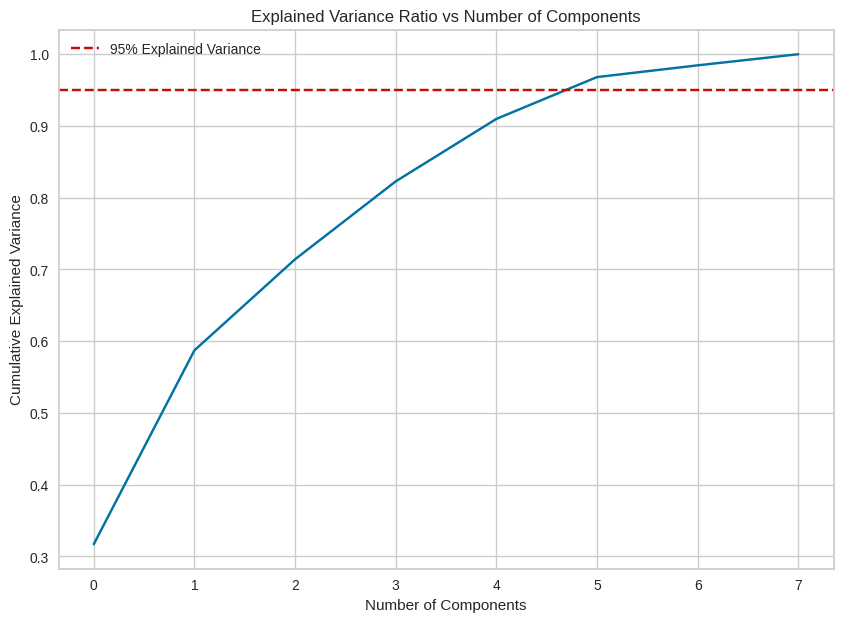

In [27]:

from sklearn.decomposition import PCA

# Fit PCA
pca = PCA().fit(numeric_standardized)

# Plot the explained variance ratio
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio vs Number of Components')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
plt.legend(loc='best')
plt.show()


In [28]:
n_components = 5
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(numeric_standardized)


pca_df = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(n_components)])

In [29]:

categorical_data = df.select_dtypes(exclude=['float64', 'int64'])
final_data = pd.concat([pca_df, categorical_data.reset_index(drop=True)], axis=1)

final_data.head()

,PC1,PC2,PC3,PC4,PC5,Sex,Party,Candidate_Type,Constituency_Type,Sub_Region,Turncoat,Incumbent,Recontest,MyNeta_education,TCPD_Prof_Main
0,-0.935791,-0.625403,0.240135,-1.588056,1.747956,MAL,TDP,GENER,GEN,COASTAL ANDHRA,False,True,True,Graduate Professional,Liberal Profession or Professional
1,0.671013,-1.381171,0.364932,-0.643491,1.013044,MAL,YSRCP,GENER,GEN,COASTAL ANDHRA,False,False,False,Post Graduate,Liberal Profession or Professional
2,-0.975470,3.285443,-0.859510,-0.660199,1.855196,MAL,TDP,GENER,GEN,COASTAL ANDHRA,False,True,True,12th Pass,Politics
3,0.330721,-0.850900,1.004930,-0.753366,0.044648,FEM,YSRCP,GENER,GEN,COASTAL ANDHRA,False,False,False,10th Pass,Business
4,-2.164133,4.341725,-0.312623,-0.432445,1.253849,MAL,YSRCP,GENER,GEN,COASTAL ANDHRA,False,False,True,12th Pass,Agriculture


In [30]:
df=final_data
df['Incumbent']=df['Incumbent'].astype('int')
df['Recontest']=df['Recontest'].astype('int')
df['Turncoat']=df['Turncoat'].astype('int')
df = df.replace({'Sex': {'MAL': 1, 'FEM': 0}})
df['Party'] = df['Party'].replace({'BJP': 'Third Parties', 'IND': 'Third Parties', 'NPT': 'Third Parties'})
party_dummies = pd.get_dummies(df['Party'], prefix='Party')
df = pd.concat([df, party_dummies], axis=1)
del df['Party'],df['Party_TDP']

df = df.replace({'Constituency_Type': {'GENER': 0, 'SC': 1,'ST':2}})
df = df.replace({'Candidate_Type': {'GENER': 0, 'SC': 1,'ST':2}})
df = df.replace({'Sub_Region': {'COASTAL ANDHRA': 0, 'RAYALA SEEMA': 1}})
del df['Constituency_Type']
education_dummies = pd.get_dummies(df['MyNeta_education'], prefix='Education')
df = pd.concat([df, education_dummies], axis=1)

profession_dummies = pd.get_dummies(df['TCPD_Prof_Main'], prefix='Profession')
df = pd.concat([df, profession_dummies], axis=1)

del df['MyNeta_education'],df['TCPD_Prof_Main']

In [31]:
df

,PC1,PC2,PC3,PC4,PC5,Sex,Candidate_Type,Sub_Region,Turncoat,Incumbent,Recontest,Party_JnP,Party_YSRCP,Education_10th Pass,Education_12th Pass,Education_5th Pass,Education_8th Pass,Education_Doctorate,Education_Graduate,Education_Graduate Professional,Education_Illiterate,Education_Literate,Education_Other or Unspecified,Education_Others,Education_Post Graduate,Profession_Agriculture,Profession_Business,Profession_Education,Profession_Former Government,Profession_Labourer or Daily Wage,Profession_Liberal Profession or Professional,Profession_Other or Unspecified,Profession_Politics,Profession_Retired or Pension,Profession_Salaried Work or Employed,Profession_Small Business or Self-employed,Profession_Social Work
0,-0.935791,-0.625403,0.240135,-1.588056,1.747956,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0.671013,-1.381171,0.364932,-0.643491,1.013044,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,-0.975470,3.285443,-0.859510,-0.660199,1.855196,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0.330721,-0.850900,1.004930,-0.753366,0.044648,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,-2.164133,4.341725,-0.312623,-0.432445,1.253849,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,2.628547,0.330862,0.967346,0.390488,-1.908327,1,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
171,2.391910,0.878484,0.982453,0.726690,-1.188502,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
172,1.556476,-0.787357,-0.130183,-0.671503,-0.074496,1,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
173,0.960571,-1.644566,-0.856271,-1.053500,1.302553,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

vif_data


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Feature,VIF
0,PC1,1.631343
1,PC2,1.662768
2,PC3,1.602167
3,PC4,1.228876
4,PC5,1.424095
5,Sex,1.561109
6,Candidate_Type,2.175671
7,Sub_Region,1.528245
8,Turncoat,1.436296
9,Incumbent,1.892961


In [33]:
categorical_column_indices = ['Sex', 'Candidate_Type',
       'Sub_Region', 'Turncoat', 'Incumbent', 'Recontest',
       'Party_Third Parties', 'Party_YSRCP', 'Education_10th Pass',
       'Education_12th Pass', 'Education_5th Pass', 'Education_8th Pass',
       'Education_Doctorate', 'Education_Graduate',
       'Education_Graduate Professional', 'Education_Literate',
       'Education_Others', 'Education_Post Graduate', 'Profession_Agriculture',
       'Profession_Business', 'Profession_Education',
       'Profession_Former Government',
       'Profession_Liberal Profession or Professional',
       'Profession_Other or Unspecified', 'Profession_Politics',
       'Profession_Retired or Pension', 'Profession_Salaried Work or Employed',
       'Profession_Small Business or Self-employed', 'Profession_Social Work',
       'Profession_Student']

In [34]:
co1 = df.corr()
px.imshow(co1[(co1>0.3)|(co1<=-0.3)])

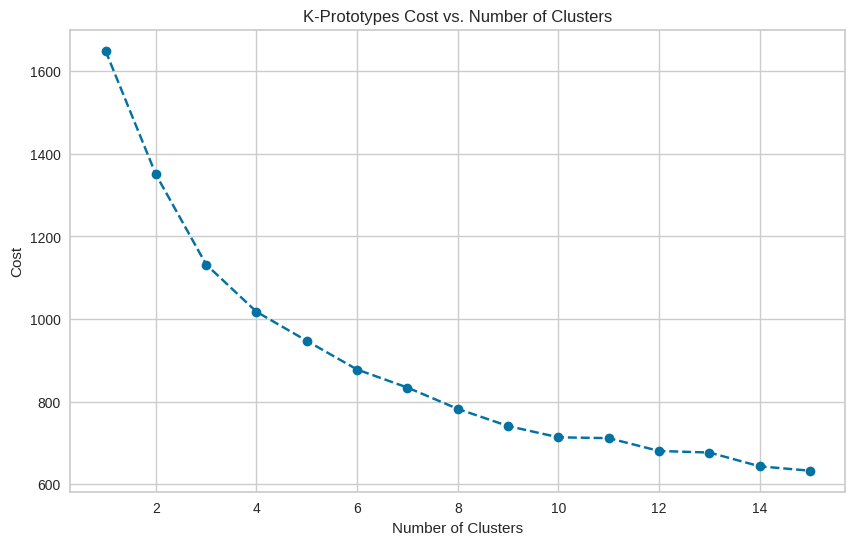

In [35]:

costs = []
max_clusters = 15
for num_clusters in range(1, max_clusters + 1):
    kproto = KPrototypes(n_clusters=num_clusters, init='Huang', random_state=42, n_jobs=-1)
    kproto.fit_predict(df, categorical=list(range(5, df.shape[1])))
    costs.append(kproto.cost_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), costs, marker='o', linestyle='--')
plt.title('K-Prototypes Cost vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

In [36]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from kmodes.kprototypes import KPrototypes

sil_scores = []
ch_scores = []

cluster_range = range(2, 15)


for num_clusters in cluster_range:
    kproto = KPrototypes(n_clusters=num_clusters, init='Huang', random_state=42, n_jobs=-1)
    clusters = kproto.fit_predict(df, categorical=list(range(5, df.shape[1])))


    sil_score = silhouette_score(df, clusters, metric='euclidean') # Using Euclidean for simplicity
    sil_scores.append(sil_score)


    ch_score = calinski_harabasz_score(df, clusters)
    ch_scores.append(ch_score)




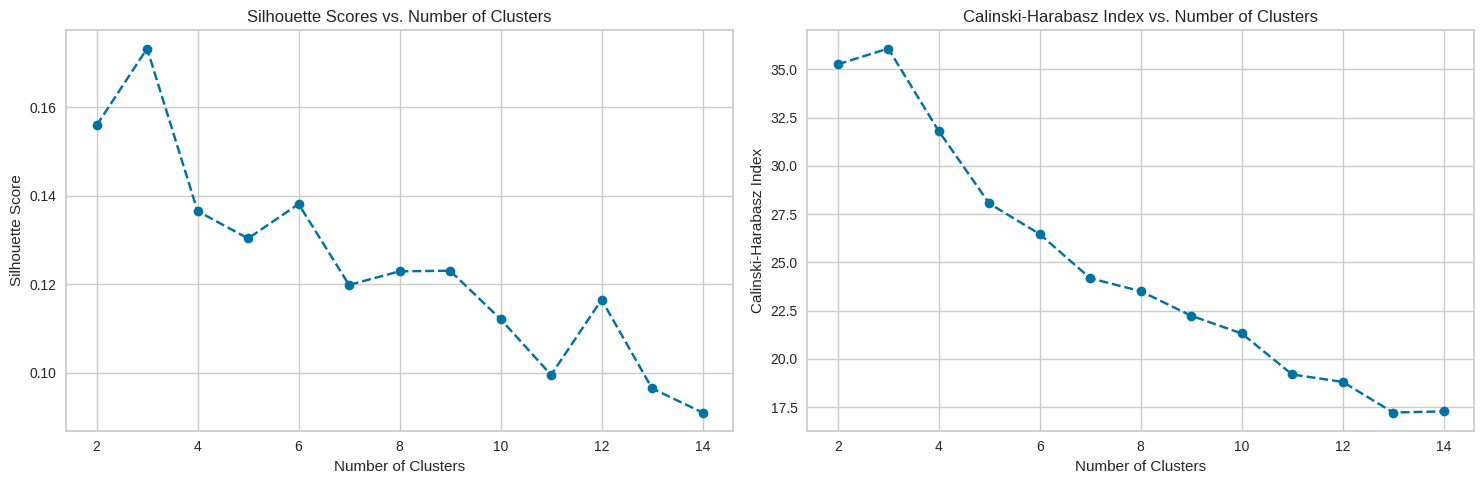

In [37]:
plt.figure(figsize=(15, 5))

# Silhouette Scores
plt.subplot(1, 2, 1)
plt.plot(cluster_range, sil_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

# Calinski-Harabasz Index
plt.subplot(1, 2, 2)
plt.plot(cluster_range, ch_scores, marker='o', linestyle='--')
plt.title('Calinski-Harabasz Index vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Index')

plt.tight_layout()
plt.show()

In [38]:
random_state_range = range(0,102)
cluster_range = range(2,12)

categorical_columns = df.select_dtypes(include=['object']).columns
categorical_column_indices = [df.columns.get_loc(col) for col in categorical_columns]

results = []

for state in random_state_range:
    for n_clusters in cluster_range:
        kproto = KPrototypes(n_clusters=n_clusters, init='Huang', random_state=state, n_jobs=-1)
        cluster_labels = kproto.fit_predict(df, categorical=list(range(5, df.shape[1])))

        silhouette_avg = silhouette_score(df, cluster_labels)
        calinski_score = calinski_harabasz_score(df, cluster_labels)
        distortion = kproto.cost_

        results.append({
            'random_state': state,
            'n_clusters': n_clusters,
            'silhouette_score': silhouette_avg,
            'calinski_score': calinski_score,
            'distortion': distortion
        })

df_results = pd.DataFrame(results)

df_results


,random_state,n_clusters,silhouette_score,calinski_score,distortion
0,0,2,0.155861,35.251846,1350.367348
1,0,3,0.174533,36.176740,1131.880550
2,0,4,0.136879,31.882933,1017.508384
3,0,5,0.144383,28.423497,944.601563
4,0,6,0.125405,26.087793,880.659441
...,...,...,...,...,...
1015,101,7,0.129688,24.594155,828.211863
1016,101,8,0.109888,22.020390,807.681885
1017,101,9,0.106583,21.884779,751.545242
1018,101,10,0.103293,20.510383,730.790300


In [39]:
df_results.sort_values(by=['silhouette_score','calinski_score','distortion'],ascending=[False,False,True])

,random_state,n_clusters,silhouette_score,calinski_score,distortion
631,63,3,0.177262,35.867072,1132.754330
711,71,3,0.177262,35.867072,1132.754330
921,92,3,0.177262,35.867072,1132.754330
141,14,3,0.177262,35.867072,1132.754330
161,16,3,0.177262,35.867072,1132.754330
...,...,...,...,...,...
118,11,10,0.089942,20.674463,725.944116
579,57,11,0.087765,19.616687,699.999649
569,56,11,0.087533,18.768184,718.561870
738,73,10,0.087407,19.702832,742.165118


In [40]:
px.box(df_results,x='n_clusters',y='silhouette_score')

In [41]:
px.box(df_results,x='n_clusters',y='calinski_score')

In [42]:
import plotly.graph_objects as go
fig = px.box(df_results,x='n_clusters',y='distortion')

medians = df_results.groupby('n_clusters')['distortion'].median().sort_index()

fig.add_trace(go.Scatter(x=medians.index, y=medians.values, mode='lines+markers', name='medians'))

fig.show()

In [43]:
df_results=df_results[df_results['n_clusters']==3]

In [44]:
df_results.sort_values(by=['silhouette_score','calinski_score','distortion'],ascending=[False,False,True])

,random_state,n_clusters,silhouette_score,calinski_score,distortion
631,63,3,0.177262,35.867072,1132.754330
711,71,3,0.177262,35.867072,1132.754330
921,92,3,0.177262,35.867072,1132.754330
141,14,3,0.177262,35.867072,1132.754330
161,16,3,0.177262,35.867072,1132.754330
...,...,...,...,...,...
301,30,3,0.171450,36.126091,1131.591283
481,48,3,0.171450,36.126091,1131.591283
801,80,3,0.171450,36.126091,1131.591283
821,82,3,0.171450,36.126091,1131.591283


In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
from scipy.spatial.distance import cdist
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer

In [46]:
kmeanModel = KMeans(n_clusters=3,random_state=63).fit(df)
kmeanModel.fit(df)
predicted=kmeanModel.predict(df)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [47]:
andhra=andhra[(andhra['Position']==1)]
andhra=andhra[(andhra['Poll_No']==0)]

In [48]:
andhra

,Election_Type,State_Name,Assembly_No,Constituency_No,Year,month,Poll_No,DelimID,Position,Candidate,Sex,Party,Votes,Candidate_Type,Valid_Votes,Electors,Constituency_Name,Constituency_Type,Sub_Region,N_Cand,Turnout_Percentage,Vote_Share_Percentage,Deposit_Lost,Margin,Margin_Percentage,ENOP,pid,Party_Type_TCPD,Party_ID,last_poll,Contested,Last_Party,Last_Party_ID,Last_Constituency_Name,Same_Constituency,Same_Party,No_Terms,Turncoat,Incumbent,Recontest,Age,District_Name,PC_Name,PC_No,CandID,MyNeta_education,TCPD_Prof_Main,TCPD_Prof_Main_Desc,TCPD_Prof_Second,TCPD_Prof_Second_Desc
24747,AE,Andhra_Pradesh,15,1,2019,4,0,4,1,ASHOK BENDALAM,MAL,TDP,79992,GENER,172423,247941,ICHCHAPURAM,GEN,COASTAL ANDHRA,7,69.54,46.39,no,7145,4.14,2.50,AEAP1810,NaN,8300,True,2.0,TDP,8300.0,ICHCHAPURAM,True,True,2.0,False,True,True,37.0,SRIKAKULAM,NaN,NaN,NaN,Graduate Professional,Liberal Profession or Professional,Doctor,NaN,NaN
24754,AE,Andhra_Pradesh,15,2,2019,4,0,4,1,APPALARAJU SEEDIRI,MAL,YSRCP,76603,GENER,150691,206799,PALASA,GEN,COASTAL ANDHRA,10,72.87,50.83,no,16247,10.78,2.38,AEAP83693,NaN,8615,True,1.0,NaN,NaN,NaN,NaN,NaN,1.0,False,False,False,39.0,SRIKAKULAM,NaN,NaN,NaN,Post Graduate,Liberal Profession or Professional,Doctor,NaN,NaN
24764,AE,Andhra_Pradesh,15,3,2019,4,0,4,1,ATCHANNAIDU KINJARAPU,MAL,TDP,87658,GENER,176583,224852,TEKKALI,GEN,COASTAL ANDHRA,9,78.53,49.64,no,8545,4.84,2.22,AEAP12964,NaN,8300,True,6.0,TDP,8300.0,TEKKALI,True,True,5.0,False,True,True,49.0,SRIKAKULAM,NaN,NaN,NaN,12th Pass,Politics,Minister,NaN,NaN
24773,AE,Andhra_Pradesh,15,4,2019,4,0,4,1,REDDY SHANTHI,FEM,YSRCP,76941,GENER,152599,217897,PATHAPATNAM,GEN,COASTAL ANDHRA,9,70.03,50.42,no,15551,10.19,2.44,AEAP815626,NaN,8615,True,1.0,NaN,NaN,NaN,NaN,NaN,1.0,False,False,False,51.0,SRIKAKULAM,NaN,NaN,NaN,10th Pass,Business,NaN,NaN,NaN
24782,AE,Andhra_Pradesh,15,5,2019,4,0,4,1,DHARMANA PRASADA RAO,MAL,YSRCP,84084,GENER,177297,256243,SRIKAKULAM,GEN,COASTAL ANDHRA,9,69.19,47.43,no,5777,3.26,2.38,AEAP18111,NaN,8615,True,8.0,YSRCP,8615.0,SRIKAKULAM,True,True,5.0,False,False,True,60.0,SRIKAKULAM,NaN,NaN,NaN,12th Pass,Agriculture,NaN,Social Work,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26984,AE,Andhra_Pradesh,15,171,2019,4,0,4,1,K. NARAYANA SWAMY,MAL,YSRCP,103038,SC,172673,199874,GANGADHARA NELLORE,SC,RAYALA SEEMA,12,86.39,59.67,no,45594,26.40,2.13,AEAP83625,NaN,8615,True,1.0,NaN,NaN,NaN,NaN,NaN,1.0,False,False,False,70.0,CHITTOOR,NaN,NaN,NaN,Graduate,Agriculture,NaN,NaN,NaN
26996,AE,Andhra_Pradesh,15,172,2019,4,0,4,1,Aranii Srenevasulu (Jangalapalli),MAL,YSRCP,91206,GENER,151550,193904,CHITTOOR,GEN,RAYALA SEEMA,12,78.16,60.18,no,39968,26.37,2.13,AEAP8630,NaN,8615,True,3.0,YSRCP,8615.0,CHITTOOR,True,True,1.0,False,False,True,66.0,CHITTOOR,NaN,NaN,NaN,12th Pass,Business,NaN,NaN,NaN
27008,AE,Andhra_Pradesh,15,173,2019,4,0,4,1,M. BABU,MAL,YSRCP,103265,SC,186918,216240,PUTHALAPATTU,SC,RAYALA SEEMA,11,86.44,55.25,no,29163,15.60,2.13,AEAP83867,NaN,8615,True,1.0,NaN,NaN,NaN,NaN,NaN,1.0,False,False,False,48.0,CHITTOOR,NaN,NaN,NaN,5th Pass,Business,Real Estate or Builder or Developer or Constru...,Agriculture,NaN
27019,AE,Andhra_Pradesh,15,174,2019,4,0,4,1,N VENKATE GOWDA,MAL,YSRCP,119241,GENER,218957,256090,PALAMANER,GEN,RAYALA SEEMA,11,85.50,54.46,no,31616,14.44,2.17,AEAP83658,NaN,8615,True,1.0,NaN,NaN,NaN,NaN,NaN,1.0,False,False,False,32.0,CHITTOOR,NaN,NaN,NaN,8th Pass,Business,NaN,NaN,NaN


<Axes: xlabel='predicted', ylabel='count'>

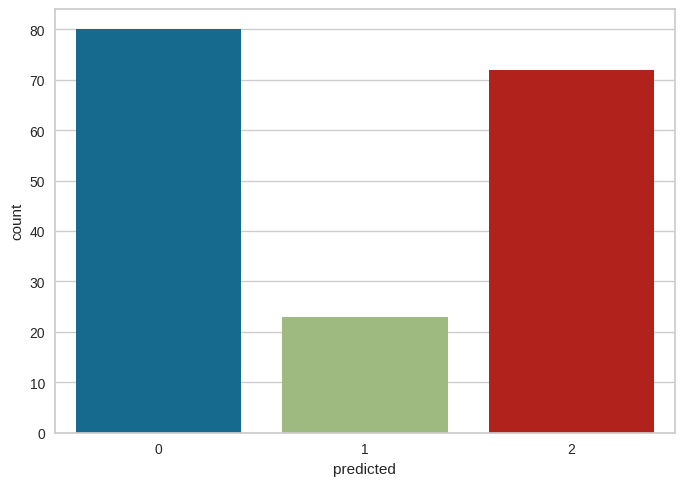

In [49]:
andhra['predicted']=predicted
sns.countplot(x=andhra['predicted'])

In [50]:
fig = px.box(andhra, y='Margin', x='predicted')
fig.update_traces(marker_size=10)
fig.show()

In [51]:
fig = px.box(andhra, y='N_Cand', x='predicted')
fig.update_traces(marker_size=10)
fig.show()

In [52]:
fig = px.box(andhra, y='Votes', x='predicted')
fig.update_traces(marker_size=10)
fig.show()

In [53]:
fig = px.box(andhra, y='Valid_Votes', x='predicted')
fig.update_traces(marker_size=10)
fig.show()

In [54]:
fig = px.box(andhra, y='Electors', x='predicted')
fig.update_traces(marker_size=10)
fig.show()

In [55]:
fig = px.box(andhra, y='Margin_Percentage', x='predicted')
fig.update_traces(marker_size=10)
fig.show()

In [56]:
fig = px.box(andhra, y='Turnout_Percentage', x='predicted')
fig.update_traces(marker_size=10)
fig.show()

In [57]:
fig = px.box(andhra, y='ENOP', x='predicted')
fig.update_traces(marker_size=10)
fig.show()

In [58]:
fig = px.box(andhra, y='N_Cand', x='predicted')
fig.update_traces(marker_size=10)
fig.show()

<Axes: xlabel='Incumbent', ylabel='count'>

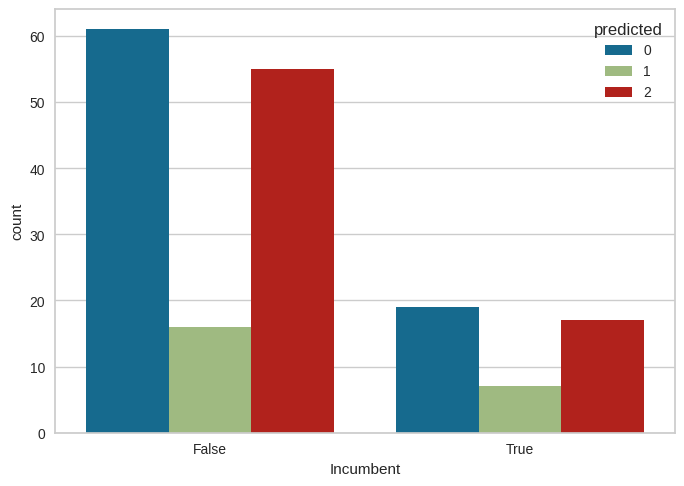

In [59]:
sns.countplot(x=andhra['Incumbent'], hue=andhra['predicted'])

<Axes: xlabel='Constituency_Type', ylabel='count'>

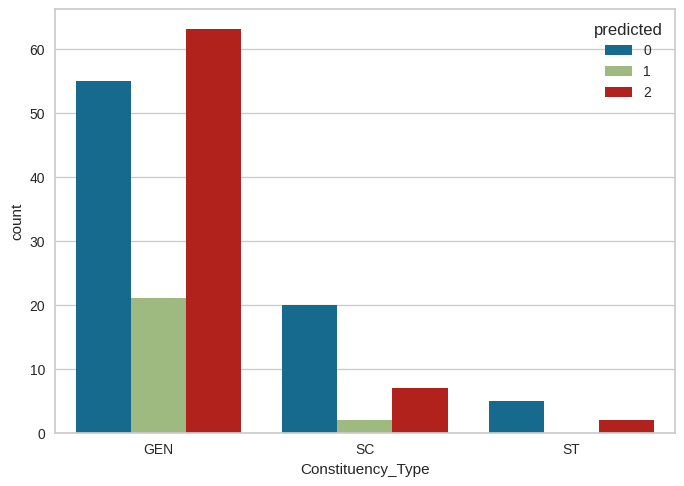

In [61]:
sns.countplot(x=andhra['Constituency_Type'], hue=andhra['predicted'])

In [62]:
andhra[andhra['predicted']==0]

,Election_Type,State_Name,Assembly_No,Constituency_No,Year,month,Poll_No,DelimID,Position,Candidate,Sex,Party,Votes,Candidate_Type,Valid_Votes,Electors,Constituency_Name,Constituency_Type,Sub_Region,N_Cand,Turnout_Percentage,Vote_Share_Percentage,Deposit_Lost,Margin,Margin_Percentage,ENOP,pid,Party_Type_TCPD,Party_ID,last_poll,Contested,Last_Party,Last_Party_ID,Last_Constituency_Name,Same_Constituency,Same_Party,No_Terms,Turncoat,Incumbent,Recontest,Age,District_Name,PC_Name,PC_No,CandID,MyNeta_education,TCPD_Prof_Main,TCPD_Prof_Main_Desc,TCPD_Prof_Second,TCPD_Prof_Second_Desc,predicted
24754,AE,Andhra_Pradesh,15,2,2019,4,0,4,1,APPALARAJU SEEDIRI,MAL,YSRCP,76603,GENER,150691,206799,PALASA,GEN,COASTAL ANDHRA,10,72.87,50.83,no,16247,10.78,2.38,AEAP83693,NaN,8615,True,1.0,NaN,NaN,NaN,NaN,NaN,1.0,False,False,False,39.0,SRIKAKULAM,NaN,NaN,NaN,Post Graduate,Liberal Profession or Professional,Doctor,NaN,NaN,0
24773,AE,Andhra_Pradesh,15,4,2019,4,0,4,1,REDDY SHANTHI,FEM,YSRCP,76941,GENER,152599,217897,PATHAPATNAM,GEN,COASTAL ANDHRA,9,70.03,50.42,no,15551,10.19,2.44,AEAP815626,NaN,8615,True,1.0,NaN,NaN,NaN,NaN,NaN,1.0,False,False,False,51.0,SRIKAKULAM,NaN,NaN,NaN,10th Pass,Business,NaN,NaN,NaN,0
24798,AE,Andhra_Pradesh,15,7,2019,4,0,4,1,Gorle. Kiran Kumar,MAL,YSRCP,99672,GENER,195372,232070,ETCHERLA,GEN,COASTAL ANDHRA,10,84.19,51.02,no,18711,9.58,2.33,AEAP815623,NaN,8615,True,1.0,NaN,NaN,NaN,NaN,NaN,1.0,False,False,False,53.0,SRIKAKULAM,NaN,NaN,NaN,Post Graduate,Agriculture,NaN,NaN,NaN,0
24808,AE,Andhra_Pradesh,15,8,2019,4,0,4,1,DHARMANA KRISHNA DAS,MAL,YSRCP,86797,GENER,167529,210451,NARASANNAPETA,GEN,COASTAL ANDHRA,10,79.60,51.81,no,19555,11.67,2.33,AEAP6300,NaN,8615,True,1.0,NaN,NaN,NaN,NaN,NaN,1.0,False,False,False,64.0,SRIKAKULAM,NaN,NaN,NaN,Graduate,Salaried Work or Employed,NaN,NaN,NaN,0
24818,AE,Andhra_Pradesh,15,9,2019,4,0,4,1,KAMBALA JOGULU,MAL,YSRCP,83561,SC,162534,220006,RAJAM,SC,COASTAL ANDHRA,7,73.88,51.41,no,16848,10.37,2.33,AEAP8726,NaN,8615,True,2.0,TDP,8300.0,PALAKONDA,False,False,2.0,True,False,False,52.0,SRIKAKULAM,NaN,NaN,NaN,Graduate Professional,Social Work,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26958,AE,Andhra_Pradesh,15,169,2019,4,0,4,1,Adimulam Koneti,MAL,YSRCP,103941,SC,176114,202843,SATYAVEDU,SC,RAYALA SEEMA,13,86.82,59.02,no,44744,25.41,2.17,AEAP83600,NaN,8615,True,1.0,NaN,NaN,NaN,NaN,NaN,1.0,False,False,False,67.0,CHITTOOR,NaN,NaN,NaN,Graduate,Agriculture,NaN,NaN,NaN,0
26984,AE,Andhra_Pradesh,15,171,2019,4,0,4,1,K. NARAYANA SWAMY,MAL,YSRCP,103038,SC,172673,199874,GANGADHARA NELLORE,SC,RAYALA SEEMA,12,86.39,59.67,no,45594,26.40,2.13,AEAP83625,NaN,8615,True,1.0,NaN,NaN,NaN,NaN,NaN,1.0,False,False,False,70.0,CHITTOOR,NaN,NaN,NaN,Graduate,Agriculture,NaN,NaN,NaN,0
26996,AE,Andhra_Pradesh,15,172,2019,4,0,4,1,Aranii Srenevasulu (Jangalapalli),MAL,YSRCP,91206,GENER,151550,193904,CHITTOOR,GEN,RAYALA SEEMA,12,78.16,60.18,no,39968,26.37,2.13,AEAP8630,NaN,8615,True,3.0,YSRCP,8615.0,CHITTOOR,True,True,1.0,False,False,True,66.0,CHITTOOR,NaN,NaN,NaN,12th Pass,Business,NaN,NaN,NaN,0
27008,AE,Andhra_Pradesh,15,173,2019,4,0,4,1,M. BABU,MAL,YSRCP,103265,SC,186918,216240,PUTHALAPATTU,SC,RAYALA SEEMA,11,86.44,55.25,no,29163,15.60,2.13,AEAP83867,NaN,8615,True,1.0,NaN,NaN,NaN,NaN,NaN,1.0,False,False,False,48.0,CHITTOOR,NaN,NaN,NaN,5th Pass,Business,Real Estate or Builder or Developer or Constru...,Agriculture,NaN,0


In [63]:
andhra[(andhra['predicted']==1)]

,Election_Type,State_Name,Assembly_No,Constituency_No,Year,month,Poll_No,DelimID,Position,Candidate,Sex,Party,Votes,Candidate_Type,Valid_Votes,Electors,Constituency_Name,Constituency_Type,Sub_Region,N_Cand,Turnout_Percentage,Vote_Share_Percentage,Deposit_Lost,Margin,Margin_Percentage,ENOP,pid,Party_Type_TCPD,Party_ID,last_poll,Contested,Last_Party,Last_Party_ID,Last_Constituency_Name,Same_Constituency,Same_Party,No_Terms,Turncoat,Incumbent,Recontest,Age,District_Name,PC_Name,PC_No,CandID,MyNeta_education,TCPD_Prof_Main,TCPD_Prof_Main_Desc,TCPD_Prof_Second,TCPD_Prof_Second_Desc,predicted
24764,AE,Andhra_Pradesh,15,3,2019,4,0,4,1,ATCHANNAIDU KINJARAPU,MAL,TDP,87658,GENER,176583,224852,TEKKALI,GEN,COASTAL ANDHRA,9,78.53,49.64,no,8545,4.84,2.22,AEAP12964,NaN,8300,True,6.0,TDP,8300.0,TEKKALI,True,True,5.0,False,True,True,49.0,SRIKAKULAM,NaN,NaN,NaN,12th Pass,Politics,Minister,NaN,NaN,1
24782,AE,Andhra_Pradesh,15,5,2019,4,0,4,1,DHARMANA PRASADA RAO,MAL,YSRCP,84084,GENER,177297,256243,SRIKAKULAM,GEN,COASTAL ANDHRA,9,69.19,47.43,no,5777,3.26,2.38,AEAP18111,NaN,8615,True,8.0,YSRCP,8615.0,SRIKAKULAM,True,True,5.0,False,False,True,60.0,SRIKAKULAM,NaN,NaN,NaN,12th Pass,Agriculture,NaN,Social Work,NaN,1
24791,AE,Andhra_Pradesh,15,6,2019,4,0,4,1,THAMMINENI SEETHARAM,MAL,YSRCP,77897,GENER,150071,189677,AMADALAVALASA,GEN,COASTAL ANDHRA,7,79.12,51.91,no,13991,9.32,2.22,AEAP20175,NaN,8615,True,9.0,YSRCP,8615.0,AMADALAVALASA,True,True,5.0,False,False,True,64.0,SRIKAKULAM,NaN,NaN,NaN,12th Pass,Politics,Party Worker,NaN,NaN,1
24857,AE,Andhra_Pradesh,15,14,2019,4,0,4,1,SAMBANGI VENKATACHINA APPALA NAIDU,MAL,YSRCP,84955,GENER,174457,220854,BOBBILI,GEN,COASTAL ANDHRA,7,78.99,48.70,no,8352,4.79,2.33,AEAP20156,NaN,8615,True,4.0,TDP,8300.0,BOBBILI,True,False,3.0,True,False,False,65.0,VIZIANAGARAM,NaN,NaN,NaN,12th Pass,Agriculture,NaN,NaN,NaN,1
24864,AE,Andhra_Pradesh,15,15,2019,4,0,4,1,BOTCHA SATYANARAYANA,MAL,YSRCP,89262,GENER,165883,198988,CHEEPURUPALLE,GEN,COASTAL ANDHRA,9,83.36,53.81,no,26498,15.97,2.33,AEAP1937,NaN,8615,True,4.0,INC,3482.0,CHEEPURUPALLE,True,False,3.0,True,False,True,60.0,VIZIANAGARAM,NaN,NaN,NaN,Graduate,Business,NaN,NaN,NaN,1
25225,AE,Andhra_Pradesh,15,44,2019,4,0,4,1,VISWARUPU PINIPE,MAL,YSRCP,72003,SC,169382,203768,AMALAPURAM,SC,COASTAL ANDHRA,10,83.12,42.51,no,25654,15.15,3.12,AEAP6735,NaN,8615,True,5.0,INC,3482.0,AMALAPURAM,True,False,3.0,True,False,False,56.0,EAST GODAVARI,NaN,NaN,NaN,Graduate Professional,Agriculture,NaN,NaN,NaN,1
25306,AE,Andhra_Pradesh,15,51,2019,4,0,4,1,Gorantla Butchaiah Choudary,MAL,TDP,74166,GENER,188827,254432,RAJAHMUNDRY RURAL,GEN,COASTAL ANDHRA,15,74.22,39.28,no,10404,5.51,3.23,AEAP18250,NaN,8300,True,8.0,TDP,8300.0,RAJAHMUNDRY RURAL,True,True,5.0,False,True,True,73.0,EAST GODAVARI,NaN,NaN,NaN,Graduate,Business,NaN,Politics,MLA,1
25569,AE,Andhra_Pradesh,15,72,2019,4,0,4,1,KODALI SRI VENKATESWARA RAO (NANI),MAL,YSRCP,89833,GENER,167902,208393,GUDIVADA,GEN,COASTAL ANDHRA,13,80.57,53.50,no,19479,11.60,2.13,AEAP9110,NaN,8615,True,4.0,YSRCP,8615.0,GUDIVADA,True,True,4.0,False,True,True,47.0,KRISHNA,NaN,NaN,NaN,8th Pass,Business,NaN,NaN,NaN,1
25739,AE,Andhra_Pradesh,15,84,2019,4,0,4,1,UDAYABHANU SAMINENI,MAL,YSRCP,87965,GENER,176115,195729,JAGGAYYAPETA,GEN,COASTAL ANDHRA,11,89.98,49.95,no,4778,2.71,2.13,AEAP11188,NaN,8615,True,4.0,YSRCP,8615.0,JAGGAYYAPETA,True,True,2.0,False,False,True,64.0,KRISHNA,NaN,NaN,NaN,Graduate,Business,NaN,NaN,NaN,1
25993,AE,Andhra_Pradesh,15,98,2019,4,0,4,1,AMBATI RAMBABU,MAL,YSRCP,105063,GENER,203731,231039,SATTENAPALLE,GEN,COASTAL ANDHRA,16,88.18,51.57,no,20876,10.25,2.27,AEAP3083,NaN,8615,True,5.0,YSRCP,8615.0,SATTENAPALLE,True,True,2.0,False,False,True,61.0,GUNTUR,NaN,NaN,NaN,Graduate Professional,Business,NaN,Politics,Party Worker,1


In [64]:
andhra[(andhra['predicted']==2)]

,Election_Type,State_Name,Assembly_No,Constituency_No,Year,month,Poll_No,DelimID,Position,Candidate,Sex,Party,Votes,Candidate_Type,Valid_Votes,Electors,Constituency_Name,Constituency_Type,Sub_Region,N_Cand,Turnout_Percentage,Vote_Share_Percentage,Deposit_Lost,Margin,Margin_Percentage,ENOP,pid,Party_Type_TCPD,Party_ID,last_poll,Contested,Last_Party,Last_Party_ID,Last_Constituency_Name,Same_Constituency,Same_Party,No_Terms,Turncoat,Incumbent,Recontest,Age,District_Name,PC_Name,PC_No,CandID,MyNeta_education,TCPD_Prof_Main,TCPD_Prof_Main_Desc,TCPD_Prof_Second,TCPD_Prof_Second_Desc,predicted
24747,AE,Andhra_Pradesh,15,1,2019,4,0,4,1,ASHOK BENDALAM,MAL,TDP,79992,GENER,172423,247941,ICHCHAPURAM,GEN,COASTAL ANDHRA,7,69.54,46.39,no,7145,4.14,2.50,AEAP1810,NaN,8300,True,2.0,TDP,8300.0,ICHCHAPURAM,True,True,2.0,False,True,True,37.0,SRIKAKULAM,NaN,NaN,NaN,Graduate Professional,Liberal Profession or Professional,Doctor,NaN,NaN,2
24896,AE,Andhra_Pradesh,15,18,2019,4,0,4,1,VEERA BHADRA SWAMY KOLAGATLA,MAL,YSRCP,78849,GENER,164420,232031,VIZIANAGARAM,GEN,COASTAL ANDHRA,10,70.86,47.96,no,6417,3.90,2.38,AEAP16402,NaN,8615,True,3.0,INC,3482.0,VIZIANAGARAM,True,False,1.0,True,False,False,59.0,VIZIANAGARAM,NaN,NaN,NaN,12th Pass,Business,NaN,NaN,NaN,2
24916,AE,Andhra_Pradesh,15,20,2019,4,0,4,1,MUTTAMSETTI SRINIVASARAO (AVANTHI SRINIVAS),MAL,YSRCP,101629,GENER,229890,307144,BHIMILI,GEN,COASTAL ANDHRA,11,74.85,44.21,no,9712,4.22,2.70,AEAP6419,NaN,8615,True,2.0,PRAP,6132.0,BHIMILI,True,False,2.0,True,False,False,52.0,VISHAKAPATNAM,NaN,NaN,NaN,12th Pass,Business,NaN,NaN,NaN,2
24927,AE,Andhra_Pradesh,15,21,2019,4,0,4,1,RAMAKRISHNA BABU VELAGAPUDI,MAL,TDP,87073,GENER,173804,272448,VISAKHAPATNAM EAST,GEN,COASTAL ANDHRA,16,63.79,50.10,no,26474,15.23,2.63,AEAP6429,NaN,8300,True,3.0,TDP,8300.0,VISAKHAPATNAM EAST,True,True,3.0,False,True,True,59.0,VISHAKAPATNAM,NaN,NaN,NaN,Graduate,Politics,NaN,NaN,NaN,2
24943,AE,Andhra_Pradesh,15,22,2019,4,0,4,1,GANESH KUMAR VASUPALLI,MAL,TDP,52172,GENER,125701,209356,VISAKHAPATNAM SOUTH,GEN,COASTAL ANDHRA,15,60.04,41.50,no,3729,2.97,2.94,AEAP6445,NaN,8300,True,2.0,TDP,8300.0,VISAKHAPATNAM SOUTH,True,True,1.0,False,False,False,55.0,VISHAKAPATNAM,NaN,NaN,NaN,Graduate Professional,Business,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26817,AE,Andhra_Pradesh,15,160,2019,4,0,4,1,KETHIREDDY VENKATARAMI REDDY,MAL,YSRCP,106909,GENER,210679,240543,DHARMAVARAM,GEN,RAYALA SEEMA,16,87.58,50.74,no,15666,7.44,2.22,AEAP4013,NaN,8615,True,3.0,YSRCP,8615.0,DHARMAVARAM,True,True,2.0,False,False,True,38.0,ANANTAPUR,NaN,NaN,NaN,Graduate Professional,Politics,Ex MLA,Agriculture,NaN,2
26858,AE,Andhra_Pradesh,15,163,2019,4,0,4,1,CHINTHALA RAMACHANDRA REDDY,MAL,YSRCP,87300,GENER,178447,223982,PILERU,GEN,RAYALA SEEMA,15,79.67,48.92,no,7874,4.41,2.27,AEAP81491,NaN,8615,True,4.0,YSRCP,8615.0,PILERU,True,True,2.0,False,True,True,56.0,CHITTOOR,NaN,NaN,NaN,Graduate,Agriculture,NaN,Social Work,NaN,2
26873,AE,Andhra_Pradesh,15,164,2019,4,0,4,1,M. Nawaz Basha,MAL,YSRCP,92066,GENER,179830,246284,MADANAPALLE,GEN,RAYALA SEEMA,20,73.02,51.20,no,29648,16.49,2.56,AEAP83520,NaN,8615,True,1.0,NaN,NaN,NaN,NaN,NaN,1.0,False,False,False,45.0,CHITTOOR,NaN,NaN,NaN,8th Pass,Business,NaN,NaN,NaN,2
26926,AE,Andhra_Pradesh,15,167,2019,4,0,4,1,BHUMANA KARUNAKAR REDDY,MAL,YSRCP,80544,GENER,180429,270847,TIRUPATI,GEN,RAYALA SEEMA,16,66.62,44.64,no,708,0.39,2.50,AEAP4119,NaN,8615,True,3.0,YSRCP,8615.0,TIRUPATI,True,True,1.0,False,False,True,60.0,CHITTOOR,NaN,NaN,NaN,Graduate,Small Business or Self-employed,Self-employed,NaN,NaN,2


In [65]:
andhra_2014 = andhra[[ 'Candidate', 'Sex', 'Party',
       'Votes', 'Candidate_Type', 'Valid_Votes', 'Electors',
       'Constituency_Name', 'Constituency_Type', 'Sub_Region', 'N_Cand',
       'Turnout_Percentage', 'Vote_Share_Percentage', 'Deposit_Lost', 'Margin',
       'Margin_Percentage', 'ENOP', 'last_poll', 'Contested', 'Last_Party',
       'Last_Constituency_Name', 'Same_Constituency', 'Same_Party', 'No_Terms',
       'Turncoat', 'Incumbent', 'Recontest', 'Age', 'District_Name', 'MyNeta_education', 'TCPD_Prof_Main','predicted']]

In [66]:
andhra

,Election_Type,State_Name,Assembly_No,Constituency_No,Year,month,Poll_No,DelimID,Position,Candidate,Sex,Party,Votes,Candidate_Type,Valid_Votes,Electors,Constituency_Name,Constituency_Type,Sub_Region,N_Cand,Turnout_Percentage,Vote_Share_Percentage,Deposit_Lost,Margin,Margin_Percentage,ENOP,pid,Party_Type_TCPD,Party_ID,last_poll,Contested,Last_Party,Last_Party_ID,Last_Constituency_Name,Same_Constituency,Same_Party,No_Terms,Turncoat,Incumbent,Recontest,Age,District_Name,PC_Name,PC_No,CandID,MyNeta_education,TCPD_Prof_Main,TCPD_Prof_Main_Desc,TCPD_Prof_Second,TCPD_Prof_Second_Desc,predicted
24747,AE,Andhra_Pradesh,15,1,2019,4,0,4,1,ASHOK BENDALAM,MAL,TDP,79992,GENER,172423,247941,ICHCHAPURAM,GEN,COASTAL ANDHRA,7,69.54,46.39,no,7145,4.14,2.50,AEAP1810,NaN,8300,True,2.0,TDP,8300.0,ICHCHAPURAM,True,True,2.0,False,True,True,37.0,SRIKAKULAM,NaN,NaN,NaN,Graduate Professional,Liberal Profession or Professional,Doctor,NaN,NaN,2
24754,AE,Andhra_Pradesh,15,2,2019,4,0,4,1,APPALARAJU SEEDIRI,MAL,YSRCP,76603,GENER,150691,206799,PALASA,GEN,COASTAL ANDHRA,10,72.87,50.83,no,16247,10.78,2.38,AEAP83693,NaN,8615,True,1.0,NaN,NaN,NaN,NaN,NaN,1.0,False,False,False,39.0,SRIKAKULAM,NaN,NaN,NaN,Post Graduate,Liberal Profession or Professional,Doctor,NaN,NaN,0
24764,AE,Andhra_Pradesh,15,3,2019,4,0,4,1,ATCHANNAIDU KINJARAPU,MAL,TDP,87658,GENER,176583,224852,TEKKALI,GEN,COASTAL ANDHRA,9,78.53,49.64,no,8545,4.84,2.22,AEAP12964,NaN,8300,True,6.0,TDP,8300.0,TEKKALI,True,True,5.0,False,True,True,49.0,SRIKAKULAM,NaN,NaN,NaN,12th Pass,Politics,Minister,NaN,NaN,1
24773,AE,Andhra_Pradesh,15,4,2019,4,0,4,1,REDDY SHANTHI,FEM,YSRCP,76941,GENER,152599,217897,PATHAPATNAM,GEN,COASTAL ANDHRA,9,70.03,50.42,no,15551,10.19,2.44,AEAP815626,NaN,8615,True,1.0,NaN,NaN,NaN,NaN,NaN,1.0,False,False,False,51.0,SRIKAKULAM,NaN,NaN,NaN,10th Pass,Business,NaN,NaN,NaN,0
24782,AE,Andhra_Pradesh,15,5,2019,4,0,4,1,DHARMANA PRASADA RAO,MAL,YSRCP,84084,GENER,177297,256243,SRIKAKULAM,GEN,COASTAL ANDHRA,9,69.19,47.43,no,5777,3.26,2.38,AEAP18111,NaN,8615,True,8.0,YSRCP,8615.0,SRIKAKULAM,True,True,5.0,False,False,True,60.0,SRIKAKULAM,NaN,NaN,NaN,12th Pass,Agriculture,NaN,Social Work,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26984,AE,Andhra_Pradesh,15,171,2019,4,0,4,1,K. NARAYANA SWAMY,MAL,YSRCP,103038,SC,172673,199874,GANGADHARA NELLORE,SC,RAYALA SEEMA,12,86.39,59.67,no,45594,26.40,2.13,AEAP83625,NaN,8615,True,1.0,NaN,NaN,NaN,NaN,NaN,1.0,False,False,False,70.0,CHITTOOR,NaN,NaN,NaN,Graduate,Agriculture,NaN,NaN,NaN,0
26996,AE,Andhra_Pradesh,15,172,2019,4,0,4,1,Aranii Srenevasulu (Jangalapalli),MAL,YSRCP,91206,GENER,151550,193904,CHITTOOR,GEN,RAYALA SEEMA,12,78.16,60.18,no,39968,26.37,2.13,AEAP8630,NaN,8615,True,3.0,YSRCP,8615.0,CHITTOOR,True,True,1.0,False,False,True,66.0,CHITTOOR,NaN,NaN,NaN,12th Pass,Business,NaN,NaN,NaN,0
27008,AE,Andhra_Pradesh,15,173,2019,4,0,4,1,M. BABU,MAL,YSRCP,103265,SC,186918,216240,PUTHALAPATTU,SC,RAYALA SEEMA,11,86.44,55.25,no,29163,15.60,2.13,AEAP83867,NaN,8615,True,1.0,NaN,NaN,NaN,NaN,NaN,1.0,False,False,False,48.0,CHITTOOR,NaN,NaN,NaN,5th Pass,Business,Real Estate or Builder or Developer or Constru...,Agriculture,NaN,0
27019,AE,Andhra_Pradesh,15,174,2019,4,0,4,1,N VENKATE GOWDA,MAL,YSRCP,119241,GENER,218957,256090,PALAMANER,GEN,RAYALA SEEMA,11,85.50,54.46,no,31616,14.44,2.17,AEAP83658,NaN,8615,True,1.0,NaN,NaN,NaN,NaN,NaN,1.0,False,False,False,32.0,CHITTOOR,NaN,NaN,NaN,8th Pass,Business,NaN,NaN,NaN,0


In [67]:
import geopandas as gpd
import pyproj

In [68]:
# Importing the shape file of assembly-constituencies
fp = "/content/drive/My Drive/dataverse_files/maps-master/assembly-constituencies"
map_df = gpd.read_file(fp)
map_df = map_df[map_df['ST_NAME']=='ANDHRA PRADESH']

In [69]:
map_df

,OBJECTID,ST_CODE,ST_NAME,DT_CODE,DIST_NAME,AC_NO,AC_NAME,PC_NO,PC_NAME,PC_ID,STATUS,Shape_Leng,Shape_Area,geometry
968,1,28,ANDHRA PRADESH,1.0,ADILABAD,8,Boath (ST),1,ADILABAD(ST),2801,NaN,2.542348,0.175322,"POLYGON ((78.30652 19.91426, 78.33071 19.91489..."
969,1,28,ANDHRA PRADESH,1.0,ADILABAD,7,Adilabad,1,ADILABAD(ST),2801,NaN,1.366577,0.077866,"POLYGON ((78.49092 19.79276, 78.50730 19.79774..."
970,1,28,ANDHRA PRADESH,1.0,ADILABAD,5,Asifabad (ST),1,ADILABAD(ST),2801,NaN,3.248354,0.238409,"POLYGON ((78.85763 19.65812, 78.88743 19.65542..."
971,1,28,ANDHRA PRADESH,1.0,ADILABAD,1,Sirpur,1,ADILABAD(ST),2801,NaN,2.133774,0.181435,"POLYGON ((79.80651 19.57896, 79.81635 19.57423..."
972,1,28,ANDHRA PRADESH,1.0,ADILABAD,6,Khanapur (ST),1,ADILABAD(ST),2801,NaN,2.347789,0.180807,"POLYGON ((78.77616 19.56131, 78.77511 19.53203..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259,42,28,ANDHRA PRADESH,23.0,CHITTOOR,292,Puthalapattu (SC),42,CHITTOOR (SC),2842,NaN,1.697648,0.086254,"POLYGON ((79.13947 13.39357, 79.12988 13.36498..."
1260,42,28,ANDHRA PRADESH,23.0,CHITTOOR,290,Gangadhara Nellore (SC),42,CHITTOOR (SC),2842,NaN,2.153722,0.093254,"POLYGON ((79.42512 13.48470, 79.45876 13.47981..."
1261,42,28,ANDHRA PRADESH,23.0,CHITTOOR,293,Palamaner,42,CHITTOOR (SC),2842,NaN,1.981326,0.097469,"POLYGON ((78.72809 13.35465, 78.75406 13.35562..."
1262,42,28,ANDHRA PRADESH,23.0,CHITTOOR,291,Chittoor,42,CHITTOOR (SC),2842,NaN,1.020624,0.031905,"POLYGON ((79.10409 13.26336, 79.12292 13.25850..."


In [70]:
map_df = map_df[['AC_NAME','DIST_NAME','geometry']]
map_df.reset_index(drop=True,inplace=True)
map_df.head(3)

,AC_NAME,DIST_NAME,geometry
0,Boath (ST),ADILABAD,"POLYGON ((78.30652 19.91426, 78.33071 19.91489..."
1,Adilabad,ADILABAD,"POLYGON ((78.49092 19.79276, 78.50730 19.79774..."
2,Asifabad (ST),ADILABAD,"POLYGON ((78.85763 19.65812, 78.88743 19.65542..."


<Axes: >

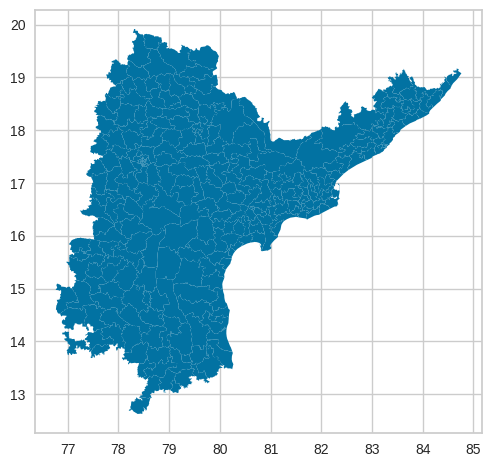

In [71]:
map_df.plot()

In [72]:
map_df.dropna(inplace=True) # The 'None' type rows are removed
map_df.reset_index(drop=True,inplace=True) # index is reset
map_df.head()

,AC_NAME,DIST_NAME,geometry
0,Boath (ST),ADILABAD,"POLYGON ((78.30652 19.91426, 78.33071 19.91489..."
1,Adilabad,ADILABAD,"POLYGON ((78.49092 19.79276, 78.50730 19.79774..."
2,Asifabad (ST),ADILABAD,"POLYGON ((78.85763 19.65812, 78.88743 19.65542..."
3,Sirpur,ADILABAD,"POLYGON ((79.80651 19.57896, 79.81635 19.57423..."
4,Khanapur (ST),ADILABAD,"POLYGON ((78.77616 19.56131, 78.77511 19.53203..."


In [73]:
def text_process(names):
    semi_cleaned_names = [word for word in names.strip().lower().split() if word not in ['(st)','(sc)','(gen)']]
    joined_cleaned_names = " ".join(semi_cleaned_names)
    removed_st_names = joined_cleaned_names.replace("(st)","")
    fully_cleaned_names = removed_st_names.replace("(sc)","")
    return fully_cleaned_names
# The cleaned names
map_df['cleaned_names']=map_df['AC_NAME'].apply(text_process)
map_df = map_df[['cleaned_names','DIST_NAME','geometry']]

In [74]:
andhra_2014['Constituency_Name'] = andhra_2014['Constituency_Name'].apply(lambda x:x.lower())
andhra_2014['District_Name'] = andhra_2014['District_Name'].apply(lambda x:x.lower())
map_df['DIST_NAME'] = map_df['DIST_NAME'].apply(lambda x:x.lower())


In [75]:
map_df['DIST_NAME'] = map_df['DIST_NAME'].replace({'visakhapatnam': 'vishakapatnam', 'cuddapah': 'kadapa'})
merged = pd.merge(andhra_2014,map_df,left_on=['District_Name','Constituency_Name'],right_on=['DIST_NAME','cleaned_names'],how='inner')
merged

,Candidate,Sex,Party,Votes,Candidate_Type,Valid_Votes,Electors,Constituency_Name,Constituency_Type,Sub_Region,N_Cand,Turnout_Percentage,Vote_Share_Percentage,Deposit_Lost,Margin,Margin_Percentage,ENOP,last_poll,Contested,Last_Party,Last_Constituency_Name,Same_Constituency,Same_Party,No_Terms,Turncoat,Incumbent,Recontest,Age,District_Name,MyNeta_education,TCPD_Prof_Main,predicted,cleaned_names,DIST_NAME,geometry
0,ASHOK BENDALAM,MAL,TDP,79992,GENER,172423,247941,ichchapuram,GEN,COASTAL ANDHRA,7,69.54,46.39,no,7145,4.14,2.50,True,2.0,TDP,ICHCHAPURAM,True,True,2.0,False,True,True,37.0,srikakulam,Graduate Professional,Liberal Profession or Professional,2,ichchapuram,srikakulam,"POLYGON ((84.73676 19.09571, 84.76474 19.07728..."
1,APPALARAJU SEEDIRI,MAL,YSRCP,76603,GENER,150691,206799,palasa,GEN,COASTAL ANDHRA,10,72.87,50.83,no,16247,10.78,2.38,True,1.0,NaN,NaN,NaN,NaN,1.0,False,False,False,39.0,srikakulam,Post Graduate,Liberal Profession or Professional,0,palasa,srikakulam,"POLYGON ((84.46612 18.99420, 84.46588 18.96358..."
2,ATCHANNAIDU KINJARAPU,MAL,TDP,87658,GENER,176583,224852,tekkali,GEN,COASTAL ANDHRA,9,78.53,49.64,no,8545,4.84,2.22,True,6.0,TDP,TEKKALI,True,True,5.0,False,True,True,49.0,srikakulam,12th Pass,Politics,1,tekkali,srikakulam,"POLYGON ((84.39360 18.74564, 84.39519 18.73398..."
3,REDDY SHANTHI,FEM,YSRCP,76941,GENER,152599,217897,pathapatnam,GEN,COASTAL ANDHRA,9,70.03,50.42,no,15551,10.19,2.44,True,1.0,NaN,NaN,NaN,NaN,1.0,False,False,False,51.0,srikakulam,10th Pass,Business,0,pathapatnam,srikakulam,"POLYGON ((84.35943 18.83158, 84.35636 18.80515..."
4,DHARMANA PRASADA RAO,MAL,YSRCP,84084,GENER,177297,256243,srikakulam,GEN,COASTAL ANDHRA,9,69.19,47.43,no,5777,3.26,2.38,True,8.0,YSRCP,SRIKAKULAM,True,True,5.0,False,False,True,60.0,srikakulam,12th Pass,Agriculture,1,srikakulam,srikakulam,"POLYGON ((83.96601 18.38461, 83.98333 18.37649..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,K. NARAYANA SWAMY,MAL,YSRCP,103038,SC,172673,199874,gangadhara nellore,SC,RAYALA SEEMA,12,86.39,59.67,no,45594,26.40,2.13,True,1.0,NaN,NaN,NaN,NaN,1.0,False,False,False,70.0,chittoor,Graduate,Agriculture,0,gangadhara nellore,chittoor,"POLYGON ((79.42512 13.48470, 79.45876 13.47981..."
171,Aranii Srenevasulu (Jangalapalli),MAL,YSRCP,91206,GENER,151550,193904,chittoor,GEN,RAYALA SEEMA,12,78.16,60.18,no,39968,26.37,2.13,True,3.0,YSRCP,CHITTOOR,True,True,1.0,False,False,True,66.0,chittoor,12th Pass,Business,0,chittoor,chittoor,"POLYGON ((79.10409 13.26336, 79.12292 13.25850..."
172,M. BABU,MAL,YSRCP,103265,SC,186918,216240,puthalapattu,SC,RAYALA SEEMA,11,86.44,55.25,no,29163,15.60,2.13,True,1.0,NaN,NaN,NaN,NaN,1.0,False,False,False,48.0,chittoor,5th Pass,Business,0,puthalapattu,chittoor,"POLYGON ((79.13947 13.39357, 79.12988 13.36498..."
173,N VENKATE GOWDA,MAL,YSRCP,119241,GENER,218957,256090,palamaner,GEN,RAYALA SEEMA,11,85.50,54.46,no,31616,14.44,2.17,True,1.0,NaN,NaN,NaN,NaN,1.0,False,False,False,32.0,chittoor,8th Pass,Business,0,palamaner,chittoor,"POLYGON ((78.72809 13.35465, 78.75406 13.35562..."


In [76]:
#cdm={'0.0':'red','1.0':'Yellow','2.0':'Green'}
cdm={'0':'Red','1':'Yellow','2':'Green','3':'Orange'}

In [77]:
merged['District-Constituency'] = merged['District_Name'] + ' _ ' +merged['Constituency_Name']

In [78]:
merged = merged.set_geometry("geometry").set_index("District-Constituency")

In [79]:


fig = px.choropleth(merged, geojson=merged.geometry, locations=merged.index, color="predicted",color_discrete_map=cdm,hover_name="DIST_NAME")
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

In [80]:
merged['District_Name'].unique()

array(['srikakulam', 'vizianagaram', 'vishakapatnam', 'east godavari',
       'west godavari', 'krishna', 'guntur', 'prakasam', 'nellore',
       'kadapa', 'kurnool', 'anantapur', 'chittoor'], dtype=object)

In [81]:

for district in merged['District_Name'].unique():
  fig = px.choropleth(merged[merged['District_Name']==district], geojson=merged[merged['District_Name']==district].geometry, locations=merged[merged['District_Name']==district].index, color="predicted",color_discrete_map=cdm)
  fig.update_geos(fitbounds="locations", visible=False)
  fig.show()

<Axes: xlabel='Party', ylabel='count'>

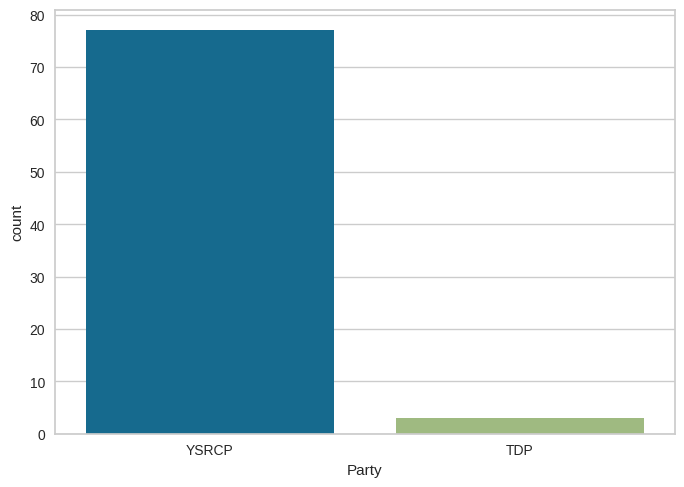

In [82]:
sns.countplot(x=andhra_2014[andhra_2014['predicted']==0]['Party'])

<Axes: xlabel='Party', ylabel='count'>

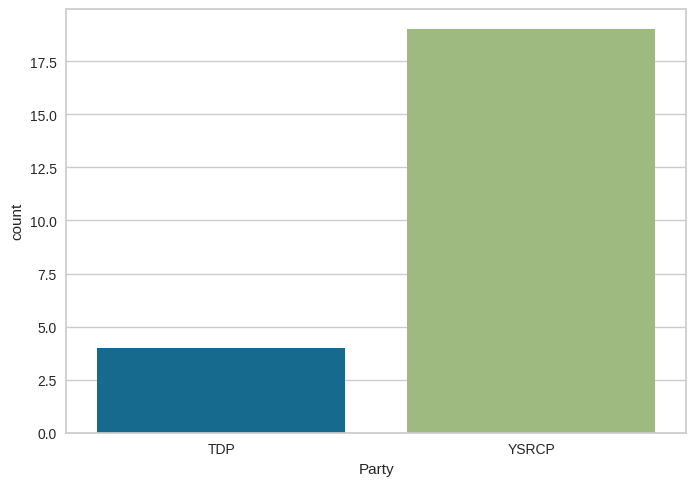

In [83]:
sns.countplot(x=andhra_2014[andhra_2014['predicted']==1]['Party'])

<Axes: xlabel='Party', ylabel='count'>

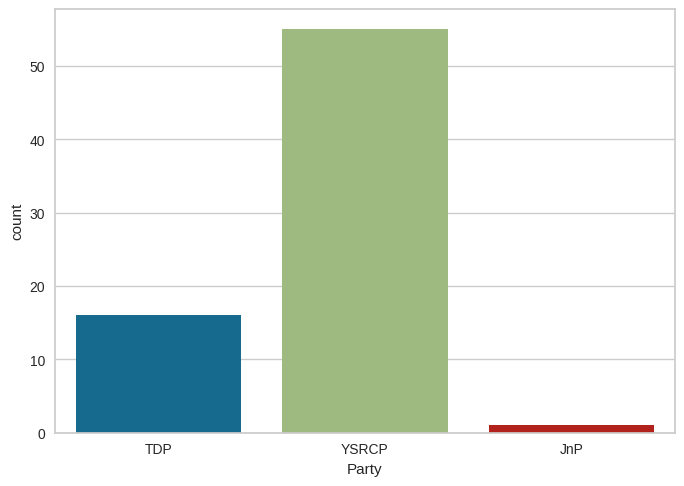

In [84]:
sns.countplot(x=andhra_2014[andhra_2014['predicted']==2]['Party'])

In [85]:
andhra_2014.columns

Index(['Candidate', 'Sex', 'Party', 'Votes', 'Candidate_Type', 'Valid_Votes',
       'Electors', 'Constituency_Name', 'Constituency_Type', 'Sub_Region',
       'N_Cand', 'Turnout_Percentage', 'Vote_Share_Percentage', 'Deposit_Lost',
       'Margin', 'Margin_Percentage', 'ENOP', 'last_poll', 'Contested',
       'Last_Party', 'Last_Constituency_Name', 'Same_Constituency',
       'Same_Party', 'No_Terms', 'Turncoat', 'Incumbent', 'Recontest', 'Age',
       'District_Name', 'MyNeta_education', 'TCPD_Prof_Main', 'predicted'],
      dtype='object')

In [86]:
fig = px.box(andhra_2014, y='Age', x='predicted')
fig.update_traces(marker_size=10)
fig.show()

<Axes: xlabel='Contested', ylabel='count'>

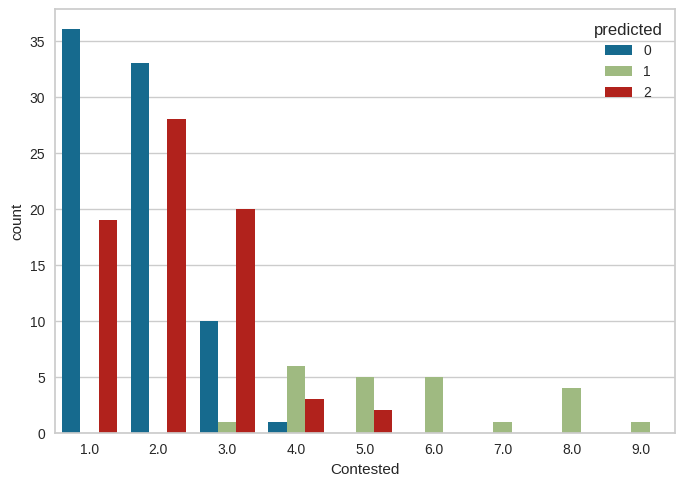

In [87]:
sns.countplot(x=andhra_2014['Contested'], hue=andhra_2014['predicted'])

<Axes: xlabel='No_Terms', ylabel='count'>

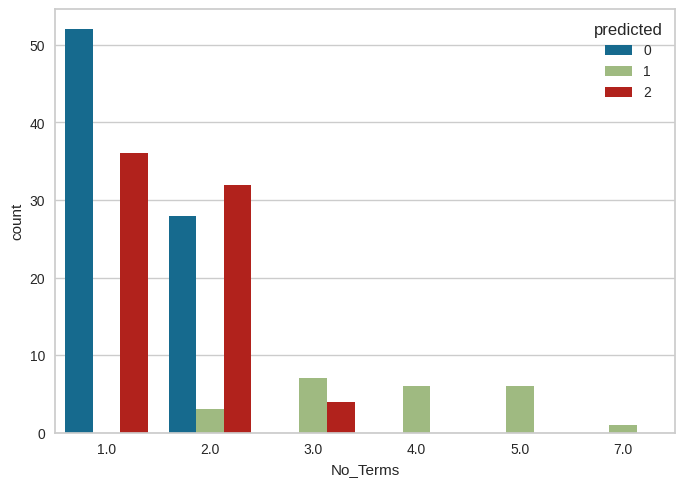

In [88]:
sns.countplot(x=andhra_2014['No_Terms'], hue=andhra_2014['predicted'])

<Axes: xlabel='Turncoat', ylabel='count'>

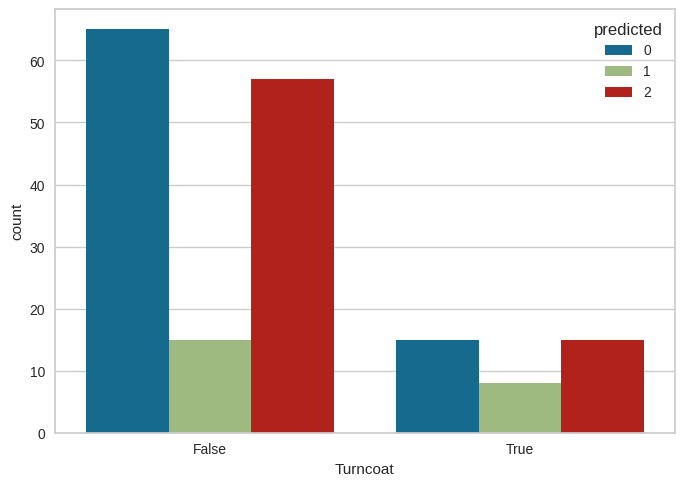

In [89]:
sns.countplot(x=andhra_2014['Turncoat'], hue=andhra_2014['predicted'])

<Axes: xlabel='MyNeta_education', ylabel='count'>

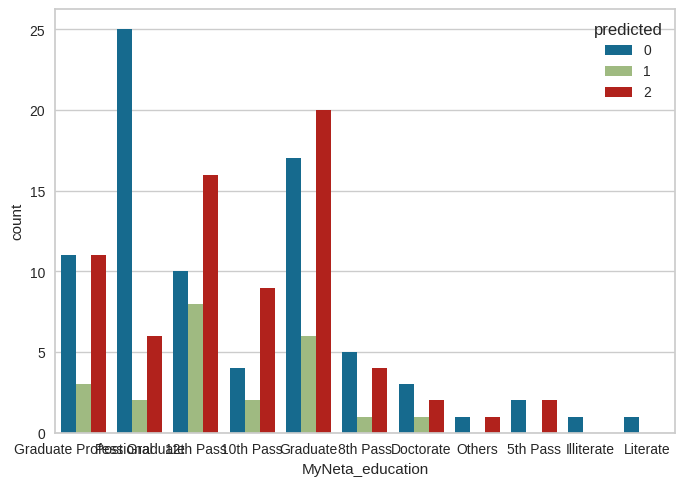

In [90]:
sns.countplot(x=andhra_2014['MyNeta_education'], hue=andhra_2014['predicted'])

In [91]:
andhra_2014.to_csv('/content/drive/My Drive/Constituency/Combined_Cluster_2019.csv')